# Importando librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ejercicio 1

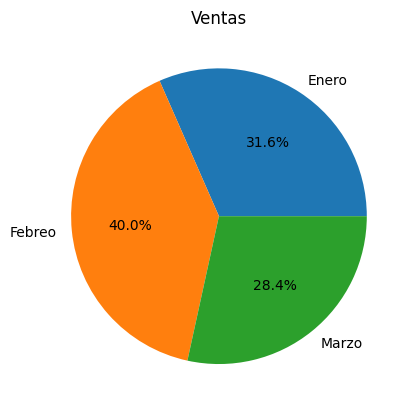

In [19]:
class Ventas:
  def __init__(self,data,titulo):
    self.data = data
    self.titulo = titulo

  def graficar(self):
    self.data.plot(kind='pie',title=self.titulo,autopct= '%1.1f%%')
    plt.savefig(self.titulo+'.png')
    plt.show()


datos = {'Enero':3000,'Febreo':3800,'Marzo':2700}
data = pd.Series(datos)

objeto_ventas = Ventas(data,'Ventas')
objeto_ventas.graficar()

# Ejercicio 2

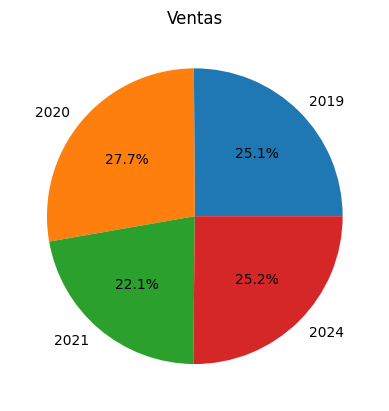

In [24]:
class Ventas:
  def __init__(self,data,titulo,dicc_graficos):
    self.data = data
    self.titulo = titulo
    self.dicc_graficos = dicc_graficos

  def graficar(self,tipo_grafica_realizar):
    if tipo_grafica_realizar == 'circular':
      self.data.plot(kind=self.dicc_graficos[tipo_grafica_realizar],title=self.titulo,autopct= '%1.1f%%')
    else:
      fig, ax = plt.subplots(figsize=(10, 6))
      self.data.plot(kind=self.dicc_graficos[tipo_grafica_realizar])
      plt.title(self.titulo)
      ax.set_xlabel('Años')
      ax.set_ylabel('Ventas')
    plt.show()

anios = [2019,2020,2021,2024]
ventas = [8976,9890,7900,9000]
data = pd.Series(ventas,index=anios)

dicc_graficos = {'lineas':'line','barras':'bar','area':'area','circular':'pie'}

objeto_ventas = Ventas(data,'Ventas',dicc_graficos)
objeto_ventas.graficar('circular')


In [21]:
dicc_graficos["circular"]

'pie'

In [12]:
anios = [2019,2020,2021,2024]
ventas = [8976,9890,7900,9000]
data = pd.Series(ventas,index=anios)
data

,0
2019,8976
2020,9890
2021,7900
2024,9000


# Ejercicio 3

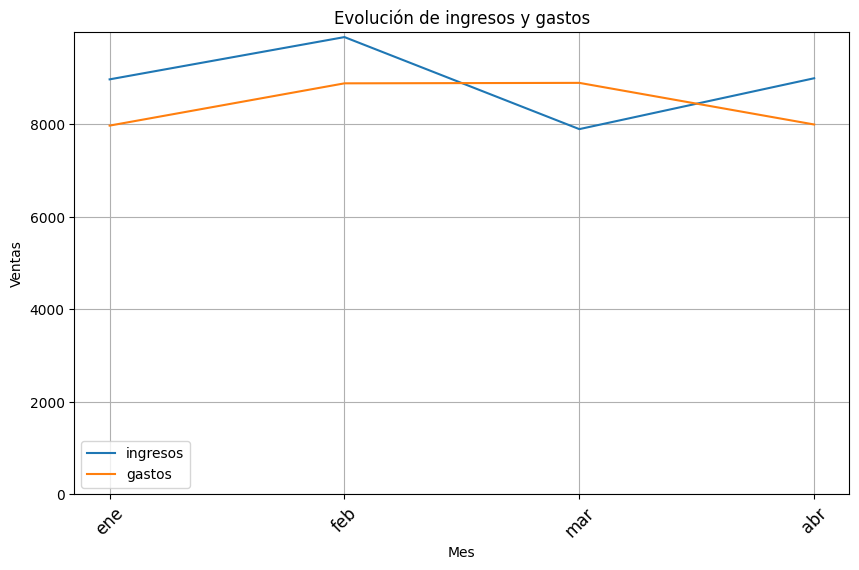

In [67]:
class Ventas:
  def __init__(self,data,titulo):
    self.data = data
    self.titulo = titulo

  def graficar(self):
    fig, ax = plt.subplots(figsize=(10, 6))
    self.data.plot(kind='line',ax=ax)
    ax.set_title(self.titulo)
    ax.set_xlabel('Mes')
    ax.set_ylabel('Ventas')
    ax.set_xticks(self.data.index)
    ax.set_xticklabels(self.data['meses'], rotation=45, fontsize=12)
    plt.grid(True)
    plt.ylim(0)
    plt.show()

data = {
    'meses':['ene','feb','mar','abr'],
    'ingresos':[8976,9890,7900,9000],
    'gastos':[7976,8890,8900,8000],
}

data_ventas = pd.DataFrame(data)
titulo = 'Evolución de ingresos y gastos'

# Crear un objeto
objeto_ventas = Ventas(data_ventas,titulo)
objeto_ventas.graficar()

In [27]:
data = {
    'meses':['ene','feb','mar','abr'],
    'ingresos':[8976,9890,7900,9000],
    'gastos':[7976,8890,6900,8000],
}

data_ventas = pd.DataFrame(data).set_index('meses')
data_ventas

,ingresos,gastos
meses,,
ene,8976,7976
feb,9890,8890
mar,7900,6900
abr,9000,8000


# Ejercicio 4

Ingrese la cantidad de encuestados: 10
  edad altura peso       sexo        imc clasificar_edad   clasificar_imc
0   38   1.35   56   Femenino  30.727023          Adulto  Obeso bajo peso
1   31   1.84   50  Masculino  14.768431          Adulto             Bajo
2   81   1.92   35   Femenino   9.494358         Anciano             Bajo
3   73   1.42   41   Femenino  20.333267         Anciano       Medio Peso
4   89   1.52   49  Masculino  21.208449         Anciano       Medio Peso
5   65   1.43   84  Masculino  41.077803    Adulto Mayor    Obeso Mórbido
6   39   1.68   52   Femenino  18.424036          Adulto       Medio Peso
7   55   1.42   30   Femenino     14.878    Adulto Mayor             Bajo
8   35   1.64   94  Masculino  34.949435          Adulto  Obeso bajo peso
9   50   1.66   46   Femenino  16.693279          Adulto             Bajo



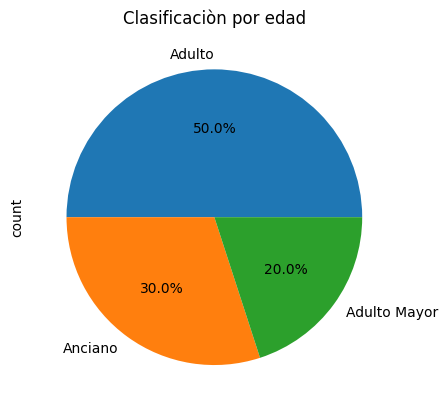

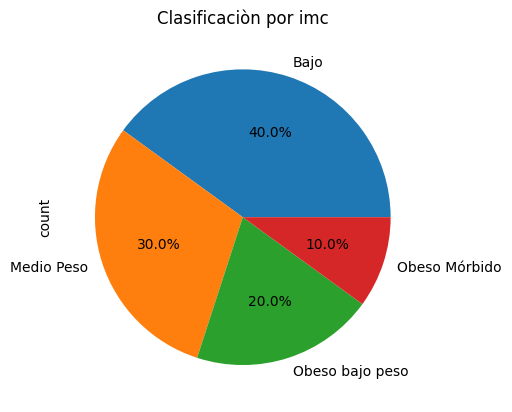

        edad  altura  peso      sexo        imc clasificar_edad clasificar_imc
count     10   10.00    10        10  10.000000              10             10
unique    10    9.00    10         2  10.000000               3              4
top       38    1.42    56  Femenino  30.727023          Adulto           Bajo
freq       1    2.00     1         6   1.000000               5              4


In [61]:
class Encuesta:
  def __init__(self,n):
    self.tamanio = n
    self.edad = 0
    self.altura = 0
    self.peso = 0
    self.sexo = ""
    self.imc = 0
    self.clasicar_edad = ""
    self.clasificar_imc = ""

    self.datos = np.empty((self.tamanio,7),dtype=object)

  def calcula_imc(self):
    self.imc = self.peso / (self.altura**2)

  def clasificar_edades(self):
    if self.edad <= 18:
      self.clasificar_edad = "Joven"
    elif self.edad <= 30:
      self.clasificar_edad = "Joven Adulto"
    elif self.edad <= 50:
      self.clasificar_edad = "Adulto"
    elif self.edad <= 70:
      self.clasificar_edad = "Adulto Mayor"
    else:
      self.clasificar_edad = "Anciano"

  def clasificar_imcs(self):
    if self.imc < 18:
      self.clasificar_imc = "Bajo"
    elif self.imc < 25:
      self.clasificar_imc = "Medio Peso"
    elif self.imc < 30:
      self.clasificar_imc = "Sobre Peso"
    elif self.imc < 35:
      self.clasificar_imc = "Obeso bajo peso"
    elif self.imc < 40:
      self.clasificar_imc = "Obeso Moderado"
    elif self.imc < 50:
      self.clasificar_imc = "Obeso Mórbido"
    else:
      self.clasificar_imc = "Obeso Extremo"

  def graficar(self,df,columna,titulo):
    df[columna].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.title(titulo)
    plt.show()

  def estadisticas(self):
    print(self.data.describe())

  def generar(self):
    for i in range(self.tamanio):
      self.edad = np.random.randint(1,100)
      self.altura = np.random.randint(130,200)/100
      self.peso = np.random.randint(30,120)
      self.sexo = np.random.choice(["Masculino","Femenino"])
      self.calcula_imc()
      self.clasificar_edades()
      self.clasificar_imcs()

      self.datos[i] = [self.edad,self.altura,self.peso,self.sexo,self.imc,self.clasificar_edad,self.clasificar_imc]

    columnas = ["edad","altura","peso","sexo","imc","clasificar_edad","clasificar_imc"]
    self.data = pd.DataFrame(self.datos,columns=columnas)
    print(self.data)
    print()
    self.graficar(self.data,"clasificar_edad","Clasificaciòn por edad")
    print()
    self.graficar(self.data,"clasificar_imc","Clasificaciòn por imc")

    self.estadisticas()




cantidad_encuestados = int(input("Ingrese la cantidad de encuestados: "))

objeto_encuesta = Encuesta(cantidad_encuestados)
objeto_encuesta.generar()


In [38]:
data = {
    'meses':['ene','feb','mar','abr'],
    'ingresos':[8976,9890,7900,9000],
    'gastos':[7976,8890,6900,8000],
}

data_ventas = pd.DataFrame(data)
data_ventas

,meses,ingresos,gastos
0,ene,8976,7976
1,feb,9890,8890
2,mar,7900,6900
3,abr,9000,8000


In [43]:
data_ventas.describe().T

,count,mean,std,min,25%,50%,75%,max
ingresos,4.0,8941.5,814.245458,7900.0,8707.0,8988.0,9222.5,9890.0
gastos,4.0,7941.5,814.245458,6900.0,7707.0,7988.0,8222.5,8890.0


In [45]:
data_ventas["ingresos"].min()

7900

# Ejercicio 5

Se ha guardado el archivo
El fabricante con mayor precio es Mercedes-Benz con el modelo 300E
Se hizo el cambio


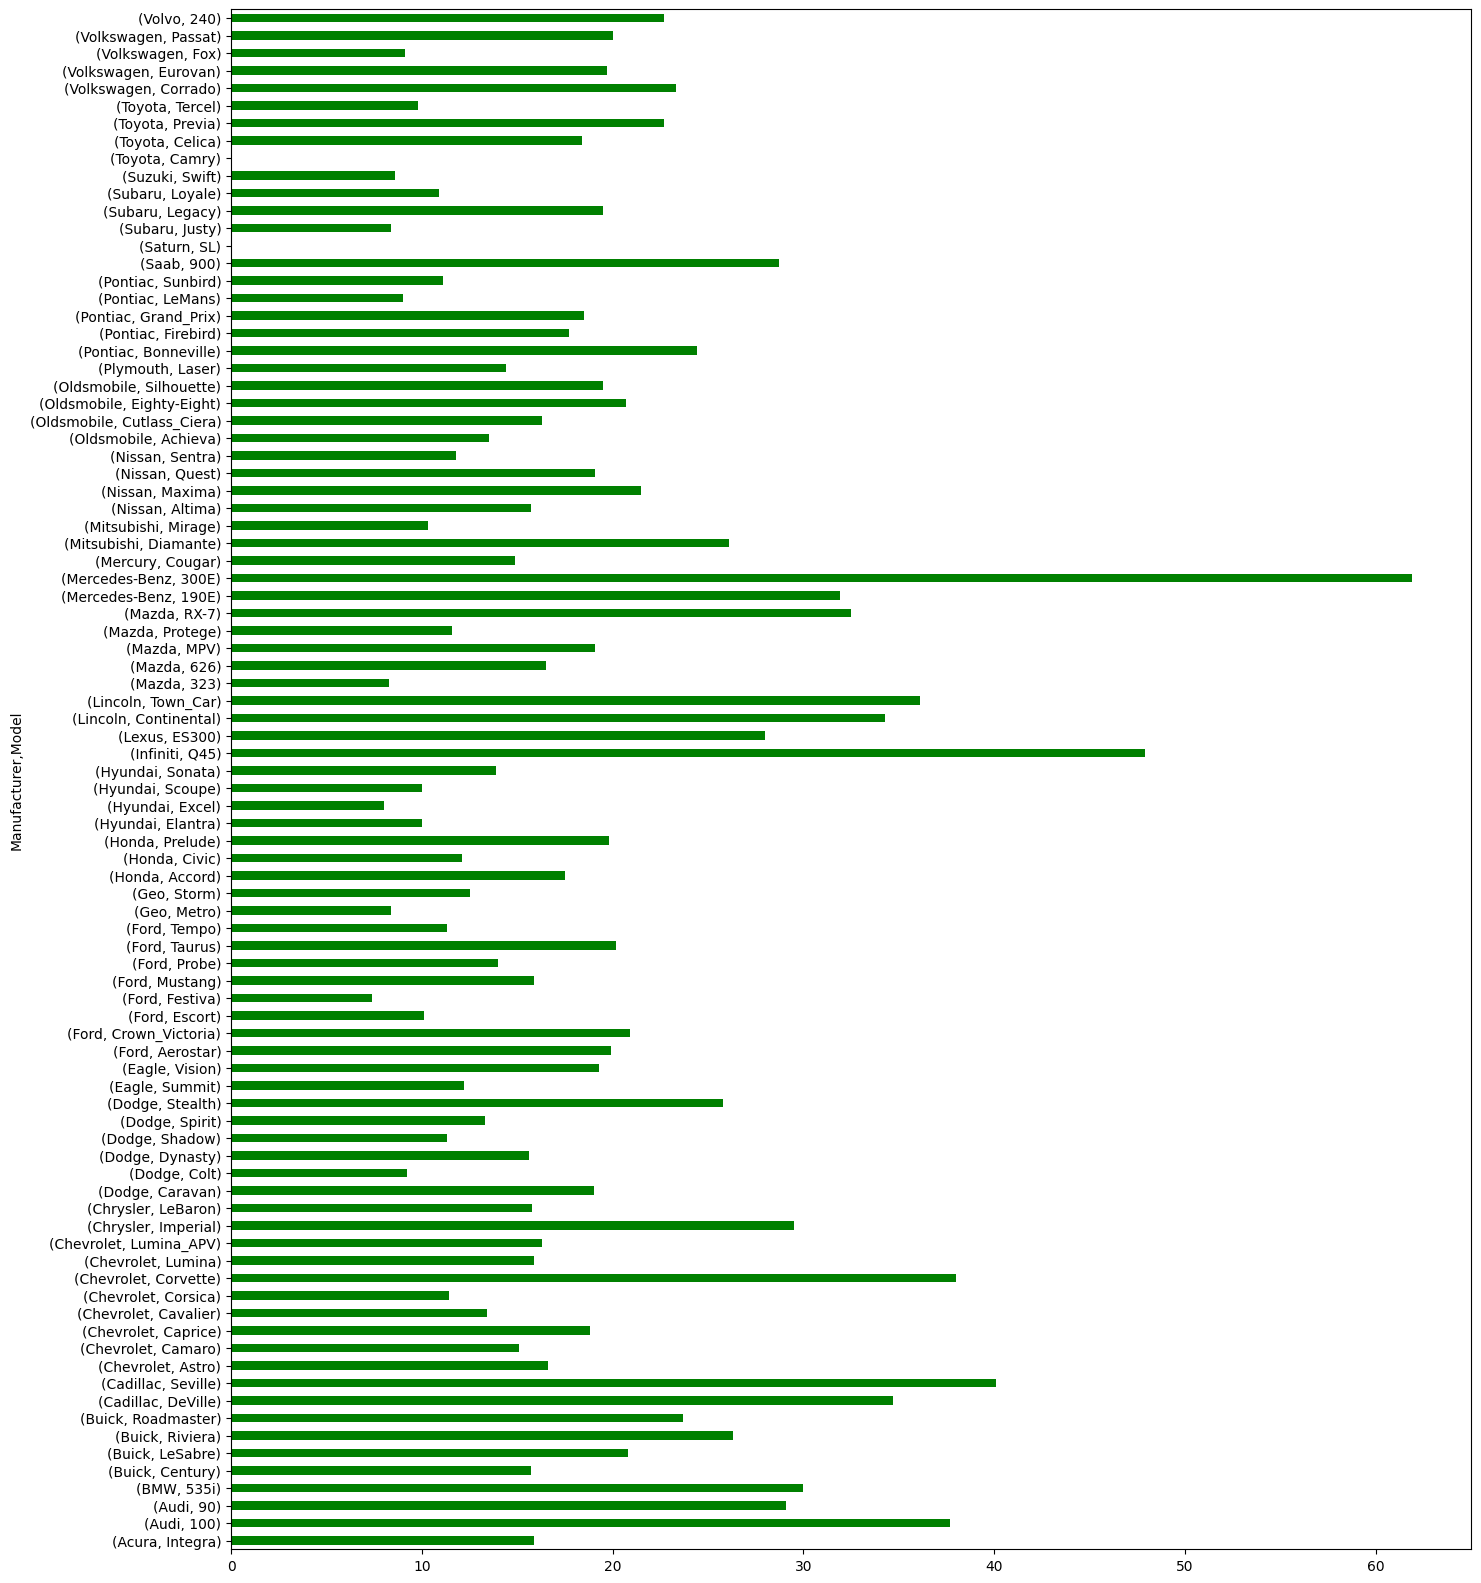

In [68]:
class Data:
  def __init__(self):
    self.__df = ''
    self.__url = 'https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv'
  def leer(self):
    self.__df = pd.read_csv(self.__url)
  def hallar_mayor_precio(self):
    fila_mayor_precio = self.__df.loc[self.__df['Price'].idxmax()]
    fabricante = fila_mayor_precio['Manufacturer']
    modelo = fila_mayor_precio['Model']
    print(f'El fabricante con mayor precio es {fabricante} con el modelo {modelo}')
  def guardar(self):
    self.__df.to_excel('datos.xlsx',index=False)
    print('Se ha guardado el archivo')
  def intercambiar(self):
    self.__df.iloc[[0,1]] = self.__df.iloc[[1,0]]
    self.__df.to_excel('modificado.xlsx',index=False)
    print('Se hizo el cambio')
  def graficar(self):
    precios_proemdios = self.__df.groupby(['Manufacturer','Model'])['Price'].mean()
    plt.figure(figsize=(16,20))
    precios_proemdios.plot(kind='barh',color='green')
    plt.show()

objeto = Data()
objeto.leer()
objeto.guardar()
objeto.hallar_mayor_precio()
objeto.intercambiar()
objeto.graficar()